In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

# Module 1: Data Exploration

### 1a. Transportation Network Providers

[ADD DESCRIPTION]

In [81]:
# Random 0.003% sample of the entire 2019 dataset
df = pd.read_csv("data/sample_003.csv", compression="gzip", index_col=0)

# Rename columns
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

df.head(5)

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,...,additional_charges,trip_total,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location
96692526,9c54e99de2a3eb56af84eb128c98d9f723a2cd72,11/11/2019 11:30:00 AM,11/11/2019 11:45:00 AM,524.0,1.9,NaN,NaN,29.0,NaN,7.5,...,2.55,10.05,False,1,41.860190,-87.717220,POINT (-87.7172201 41.8601900192),NaN,NaN,NaN
11025760,e5af9ebfe60312b7f5ee17b16f6d8ebb8533a52d,02/08/2019 10:15:00 AM,02/08/2019 10:30:00 AM,854.0,3.0,1.703124e+10,1.703184e+10,24.0,32.0,7.5,...,2.55,10.05,False,1,41.906651,-87.665338,POINT (-87.6653376596 41.9066507664),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)
24409345,e3e6e9f52cd800e77d96aa50e3bf4a71a19bcea2,03/20/2019 11:15:00 PM,03/20/2019 11:30:00 PM,793.0,7.6,1.703108e+10,1.703103e+10,8.0,77.0,12.5,...,2.55,15.05,False,1,41.899156,-87.626211,POINT (-87.6262105324 41.8991556134),41.994442,-87.665225,POINT (-87.6652247765 41.9944422482)
88969168,785241f934518559bcc2e4609657e027922e4166,10/18/2019 02:45:00 PM,10/18/2019 03:15:00 PM,1799.0,14.1,NaN,NaN,16.0,NaN,22.5,...,2.55,30.05,False,1,41.953582,-87.723452,POINT (-87.7234523905 41.9535821253),NaN,NaN,NaN
66927329,f55fbbe4a9030e0845fe53e51d4c6b059816b1f1,08/05/2019 07:30:00 AM,08/05/2019 07:30:00 AM,482.0,3.2,1.703184e+10,1.703135e+10,28.0,35.0,10.0,...,0.00,10.00,True,2,41.867902,-87.642959,POINT (-87.6429586652 41.8679024175),41.827400,-87.624089,POINT (-87.624088952 41.8274002516)


In [82]:
print("There are {:,} rows and {} columns in the dataset.".format(df.shape[0], df.shape[1]))
df.columns

There are 335,552 rows and 21 columns in the dataset.


Index(['trip_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'pickup_census_tract', 'dropoff_census_tract',
       'pickup_community_area', 'dropoff_community_area', 'fare', 'tip',
       'additional_charges', 'trip_total', 'shared_trip_authorized',
       'trips_pooled', 'pickup_centroid_latitude', 'pickup_centroid_longitude',
       'pickup_centroid_location', 'dropoff_centroid_latitude',
       'dropoff_centroid_longitude', 'dropoff_centroid_location'],
      dtype='object')

In [83]:
# Converting data types
df = df.astype({'trip_id' : str,
                'trip_start_timestamp' : 'datetime64[ns]',
                'trip_end_timestamp' : 'datetime64[ns]',
                'trip_seconds': float,
                'trip_miles': float,
                'pickup_community_area': str,
                'dropoff_community_area': str,
                'pickup_census_tract' : str,
                'dropoff_census_tract' : str,
                'fare' : float,
                'tip' : float,
                'additional_charges': float,
                'trip_total': float,
                'shared_trip_authorized': bool,
                'trips_pooled': int})
df.info()
print('''\n The first observation in the data is from {} and the 
         last observation is from {}.'''.format(df["trip_start_timestamp"].min(), 
                                                df["trip_end_timestamp"].max()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335552 entries, 96692526 to 85528272
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   trip_id                     335552 non-null  object        
 1   trip_start_timestamp        335552 non-null  datetime64[ns]
 2   trip_end_timestamp          335552 non-null  datetime64[ns]
 3   trip_seconds                334905 non-null  float64       
 4   trip_miles                  335535 non-null  float64       
 5   pickup_census_tract         335552 non-null  object        
 6   dropoff_census_tract        335552 non-null  object        
 7   pickup_community_area       335552 non-null  object        
 8   dropoff_community_area      335552 non-null  object        
 9   fare                        335552 non-null  float64       
 10  tip                         335552 non-null  float64       
 11  additional_charges          33

**For the purposes of our analysis we drop trip observations for which:**
1. there are missing values for trip duration, trip distance, pickup location, or dropoff location;
2. the trip distance is equal to 0;
3. the trip total is equal to 0 dollars or greater than 100 dollars; and/or
4. the trip duration is equal to 0 or greater than 90 minutes

In [84]:
# Cleaning data
df = df.dropna(subset=['trip_seconds', 'trip_miles', 
                       'pickup_community_area', 'dropoff_community_area', 
                       'pickup_centroid_latitude', 'dropoff_centroid_latitude',
                       'pickup_centroid_longitude', 'dropoff_centroid_longitude',
                       'pickup_centroid_location', 'dropoff_centroid_location'])
df = df[(df.fare > 0) & (df.fare < 100)]
df = df[(df.trip_miles > 0)]
df = df[(df.trip_seconds > 0) & (df.trip_seconds < 5400)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287763 entries, 11025760 to 85528272
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   trip_id                     287763 non-null  object        
 1   trip_start_timestamp        287763 non-null  datetime64[ns]
 2   trip_end_timestamp          287763 non-null  datetime64[ns]
 3   trip_seconds                287763 non-null  float64       
 4   trip_miles                  287763 non-null  float64       
 5   pickup_census_tract         287763 non-null  object        
 6   dropoff_census_tract        287763 non-null  object        
 7   pickup_community_area       287763 non-null  object        
 8   dropoff_community_area      287763 non-null  object        
 9   fare                        287763 non-null  float64       
 10  tip                         287763 non-null  float64       
 11  additional_charges          28

In [85]:
# Creating new variables
df['date'] = df['trip_start_timestamp'].dt.normalize()
df['trip_start_month'] = df['trip_start_timestamp'].dt.month
df['trip_start_weekday'] = df['trip_start_timestamp'].dt.dayofweek 
df['trip_start_hour'] = df['trip_start_timestamp'].dt.hour
# df['trip_total_per_mile'] = df['trip_total'] / df['trip_miles']
# df['trip_total_per_min'] = df['trip_total'] / (df['trip_seconds'] / 60)

### 1b. Data Visualization

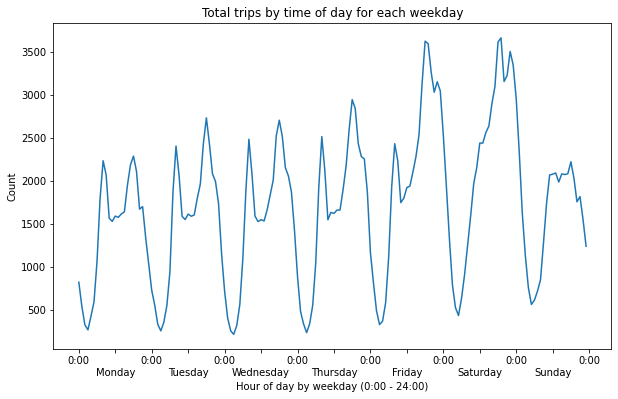

In [86]:
grouped_hour = df.groupby(['trip_start_weekday', 'trip_start_hour'])['trip_id'].count()

fig, ax = plt.subplots()
fig = grouped_hour.plot(figsize=(10, 6))
plt.xlabel("Hour of day by weekday (0:00 - 24:00)")
plt.ylabel("Count")
plt.title("Total trips by time of day for each weekday")
ax.set_xticks(np.arange(0, 169, 12))
labels = ["0:00",'\n'+'Monday',"0:00", '\n'+'Tuesday',"0:00", '\n'+'Wednesday',"0:00", '\n'+'Thursday', 
          "0:00",'\n'+'Friday', "0:00",'\n'+'Saturday',"0:00", '\n'+'Sunday', "0:00"]
ax.set_xticklabels(labels)
plt.show()

[ADD INTERPRETATION]

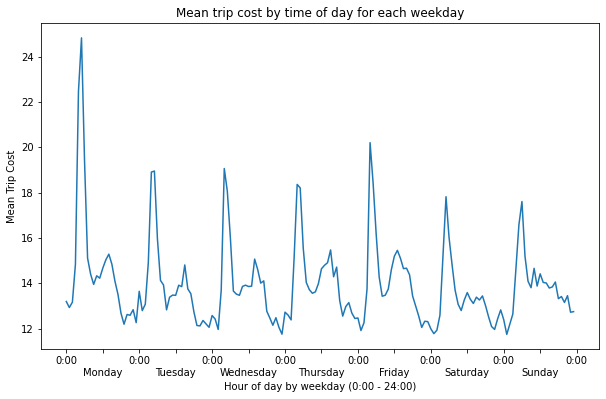

In [87]:
grouped_cost = df.groupby(['trip_start_weekday', 'trip_start_hour'])['trip_total'].mean()

fig, ax = plt.subplots()
fig = grouped_cost.plot(figsize=(10, 6))
plt.xlabel("Hour of day by weekday (0:00 - 24:00)")
plt.ylabel("Mean Trip Cost")
plt.title("Mean trip cost by time of day for each weekday")
ax.set_xticks(np.arange(0, 169, 12))
labels = ["0:00",'\n'+'Monday',"0:00", '\n'+'Tuesday',"0:00", '\n'+'Wednesday',"0:00", '\n'+'Thursday', 
          "0:00",'\n'+'Friday', "0:00",'\n'+'Saturday',"0:00", '\n'+'Sunday', "0:00"]
ax.set_xticklabels(labels)
plt.show()

[ADD INTERPRETATION]

In [89]:
# ca_grouped_mile = df.groupby(['pickup_community_area'])['trip_total_per_mile'].mean().reset_index()
# print("Top 10 Community Areas with Highest Mean Trip Total Per Mile")
# ca_grouped_mile.sort_values("trip_total_per_mile", ascending=False)[:10]

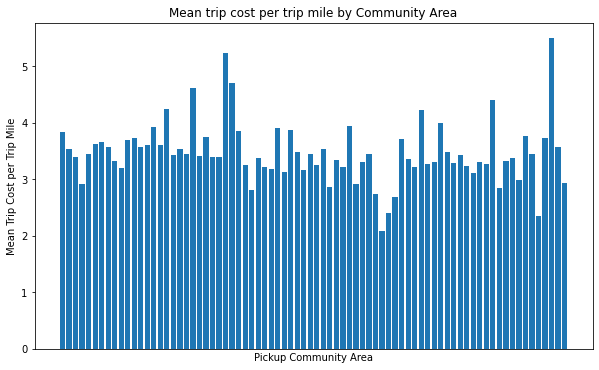

In [90]:
# fig, ax = plt.subplots(figsize=(10, 6))
# plt.bar(ca_grouped_mile["pickup_community_area"], 
#        ca_grouped_mile["trip_total_per_mile"])
# plt.xlabel("Pickup Community Area")
# plt.ylabel("Mean Trip Cost per Trip Mile")
# plt.title("Mean trip cost per trip mile by Community Area")
# ax.set_xticks([])
# plt.show()

In [ ]:
# ca_grouped_min = df.groupby(['pickup_community_area'])['trip_total_per_min'].mean().reset_index()
# print("Top 10 Community Areas with Highest Mean Trip Total Per Minute")
# ca_grouped_min.sort_values("trip_total_per_min", ascending=False)[:10]

In [91]:
# fig, ax = plt.subplots(figsize=(10, 6))
# plt.bar(ca_grouped_min["pickup_community_area"], 
#         ca_grouped_min["trip_total_per_min"])
# plt.xlabel("Pickup Community Area")
# plt.ylabel("Mean Trip Cost per Trip Minute")
# plt.title("Mean trip cost per trip minute by Community Area")
# ax.set_xticks([])
# plt.show()

### 1b. Merging TNP and CMAP Datasets

In [92]:
cmap = gpd.read_file("data/community_area/com_cmap.shp")
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["pickup_centroid_longitude"], 
                                                       df["pickup_centroid_latitude"]), crs="EPSG:4326")
gdf_cmap = gpd.sjoin(gdf, cmap, op='within')

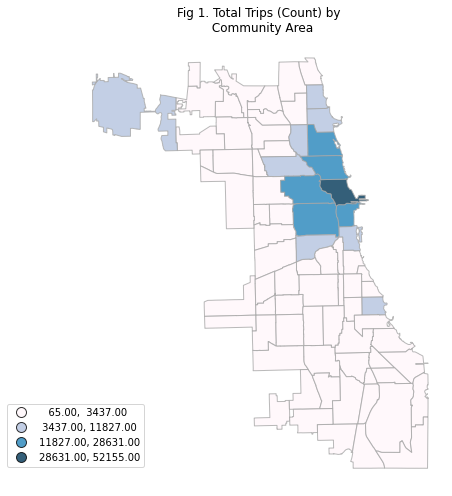

In [93]:
ride_count = gdf_cmap.groupby('area_num')["trip_id"].count().to_frame('total_trips').reset_index()
vars_by_geoid = cmap.merge(ride_count, on="area_num", how="outer")

fig = vars_by_geoid.plot(column='total_trips',
                         cmap = 'PuBu',
                         figsize=(11,7),   
                         scheme='natural_breaks', k=4, 
                         legend = True,
                         edgecolor='darkgrey',
                         alpha=0.8)
fig.set_title('Fig 1. Total Trips (Count) by \n Community Area', fontdict= {'fontsize':12})
fig.set_axis_off()
fig.get_legend().set_bbox_to_anchor((0., 0., 0.2, 0.2))

for legend_handle in fig.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    
plt.tight_layout()
plt.show()

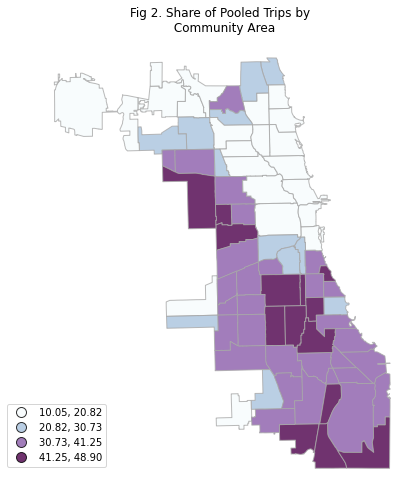

In [94]:
pooled_trips = gdf_cmap.groupby('area_num')['shared_trip_authorized'].mean().to_frame('avg_shared_trips').reset_index()
pooled_trips["avg_shared_trips"] = pooled_trips["avg_shared_trips"] * 100
vars_by_geoid = vars_by_geoid.merge(pooled_trips, on="area_num", how="outer")

fig = vars_by_geoid.plot(column='avg_shared_trips',
                                cmap = 'BuPu',
                                figsize=(11,7),   
                                scheme='natural_breaks', k=4, 
                                legend = True,
                                edgecolor='darkgrey',
                                alpha=0.8)
fig.set_title('Fig 2. Share of Pooled Trips by \n Community Area', 
              fontdict= {'fontsize':12})
fig.set_axis_off()
fig.get_legend().set_bbox_to_anchor((0., 0., 0.2, 0.2))

for legend_handle in fig.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    
plt.tight_layout()
plt.show()

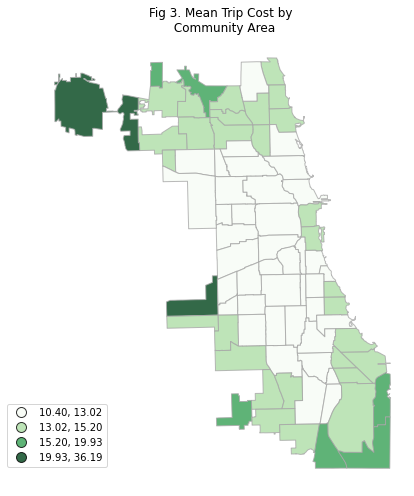

In [95]:
avg_cost = gdf_cmap.groupby('area_num')['trip_total'].mean().to_frame('avg_trip_cost').reset_index()
vars_by_geoid = vars_by_geoid.merge(avg_cost, on="area_num", how="outer")

fig = vars_by_geoid.plot(column='avg_trip_cost',
                                cmap = 'Greens',
                                figsize=(11,7),   
                                scheme='natural_breaks', k=4, 
                                legend = True,
                                edgecolor='darkgrey',
                                alpha=0.8)
fig.set_title('Fig 3. Mean Trip Cost by \n Community Area', 
              fontdict= {'fontsize':12})
fig.set_axis_off()
fig.get_legend().set_bbox_to_anchor((0., 0., 0.2, 0.2))

for legend_handle in fig.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    
plt.tight_layout()
plt.show()

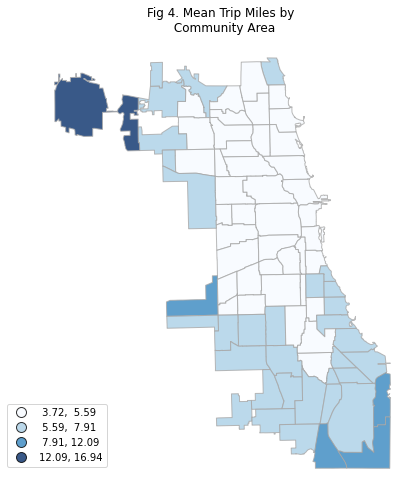

In [96]:
avg_miles = gdf_cmap.groupby('area_num')['trip_miles'].mean().to_frame('avg_trip_miles').reset_index()
vars_by_geoid = vars_by_geoid.merge(avg_miles, on="area_num", how="outer")

fig = vars_by_geoid.plot(column='avg_trip_miles',
                                cmap = 'Blues',
                                figsize=(11,7),   
                                scheme='natural_breaks', k=4, 
                                legend = True,
                                edgecolor='darkgrey',
                                alpha=0.8)
fig.set_title('Fig 4. Mean Trip Miles by \n Community Area', fontdict= {'fontsize':12})
fig.set_axis_off()
fig.get_legend().set_bbox_to_anchor((0., 0., 0.2, 0.2))

for legend_handle in fig.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    
plt.tight_layout()
plt.show()

In [98]:
# avg_tot_per_mile = gdf_cmap.groupby('area_num')['trip_total_per_mile'].mean().to_frame('trip_tot_per_mile').reset_index()
# vars_by_geoid = vars_by_geoid.merge(avg_tot_per_mile, on="area_num", how="outer")

# fig = vars_by_geoid.plot(column='trip_tot_per_mile',
#                                cmap = 'Oranges',
#                                figsize=(11,7),   
#                                scheme='natural_breaks', k=4, 
#                                legend = True,
#                                edgecolor='darkgrey',
#                                alpha=0.8)
# fig.set_title('Fig 4. Mean Cost per Mile by \n Community Area', 
#              fontdict= {'fontsize':12})
# fig.set_axis_off()
# fig.get_legend().set_bbox_to_anchor((0., 0., 0.2, 0.2))
# 
# for legend_handle in fig.get_legend().legendHandles:  
#   legend_handle._legmarker.set_markeredgewidth(1)
#    legend_handle._legmarker.set_markeredgecolor('k')
    
# plt.tight_layout()
# plt.show()

In [99]:
# avg_tot_per_min = gdf_cmap.groupby('area_num')['trip_total_per_min'].mean().to_frame('trip_total_per_min').reset_index()
# vars_by_geoid = vars_by_geoid.merge(avg_tot_per_min, on="area_num", how="outer")
# 
# fig = vars_by_geoid.plot(column='trip_total_per_min',
#                                cmap = 'Reds',
#                                figsize=(11,7),   
#                                scheme='natural_breaks', k=4, 
#                                legend = True,
#                                edgecolor='darkgrey',
#                                alpha=0.8)
# fig.set_title('Fig 4. Mean Cost per Minute by \n Community Area', 
#               fontdict= {'fontsize':12})
# fig.set_axis_off()
# fig.get_legend().set_bbox_to_anchor((0., 0., 0.2, 0.2))

# for legend_handle in fig.get_legend().legendHandles:  
#    legend_handle._legmarker.set_markeredgewidth(1)
#    legend_handle._legmarker.set_markeredgecolor('k')
    
# plt.tight_layout()
# plt.show()

[ADD INTERPRETATION]

## Module 2: Machine Learning Models

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [101]:
# 2. Boolean target whether or not a trip was authorized
gdf_cmap_model = gdf_cmap.drop(["trip_id", "trip_start_timestamp", 
                                "trip_end_timestamp", 
                                "geometry", "pickup_centroid_location", 
                                "pickup_centroid_longitude", 
                                "dropoff_centroid_location", 'dropoff_centroid_latitude',
                                "date", "pickup_census_tract", "dropoff_census_tract", 
                                "pickup_community_area", "pickup_centroid_latitude", 
                                "dropoff_community_area", "date", "index_right", 
                                "dropoff_centroid_longitude", "geog", "trips_pooled", 
                                "area_num", "additional_charges", "fare"], axis=1)
gdf_cmap_model.head(5)

,trip_seconds,trip_miles,tip,trip_total,shared_trip_authorized,trip_start_month,trip_start_weekday,trip_start_hour,med_age,medinc,...,perc_lt_hs,perc_hs,perc_some_,perc_assoc,perc_bach,perc_grad_,perc_ct_1p,perc_ct_2p,perc_ct_3p,perc_ct_4m
11025760,854.0,3.0,0.0,10.05,False,2,4,10,31.982787,96499.0138,...,7.124612,9.247096,10.945387,3.61552,43.295019,25.772365,34.452306,40.256424,14.393254,10.898016
63432119,332.0,1.4,0.0,7.55,False,7,3,8,31.982787,96499.0138,...,7.124612,9.247096,10.945387,3.61552,43.295019,25.772365,34.452306,40.256424,14.393254,10.898016
68281754,766.0,3.4,0.0,10.05,False,8,4,21,31.982787,96499.0138,...,7.124612,9.247096,10.945387,3.61552,43.295019,25.772365,34.452306,40.256424,14.393254,10.898016
80250273,428.0,1.9,0.0,7.55,False,9,3,17,31.982787,96499.0138,...,7.124612,9.247096,10.945387,3.61552,43.295019,25.772365,34.452306,40.256424,14.393254,10.898016
47522355,757.0,3.0,0.0,10.05,False,6,0,0,31.982787,96499.0138,...,7.124612,9.247096,10.945387,3.61552,43.295019,25.772365,34.452306,40.256424,14.393254,10.898016


In [102]:
X = gdf_cmap_model.drop(["shared_trip_authorized"], axis=1)
y = gdf_cmap_model["shared_trip_authorized"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [103]:
# Gaussian classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [104]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.941545465603225


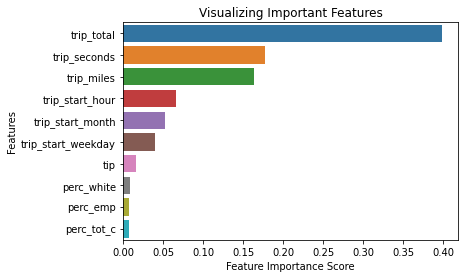

In [106]:
feature_imp = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_imp

# Creating a bar plot
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()